In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("C:\python\stroke.csv")

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


here id columns is not required ,so we can drop

In [5]:
df=df.drop(columns='id')

In [6]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [7]:
df.shape

(5110, 11)

In [8]:
print("The Datasets has",df.shape[0],"rows and ",df.shape[1],"columns")

The Datasets has 5110 rows and  11 columns


# Datatypes and info

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


The datatypes was correct

# Missing values and Duplicates

In [13]:
df.isna().sum()/len(df) *100

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

we have missing values in the bmi which less than 5 % 

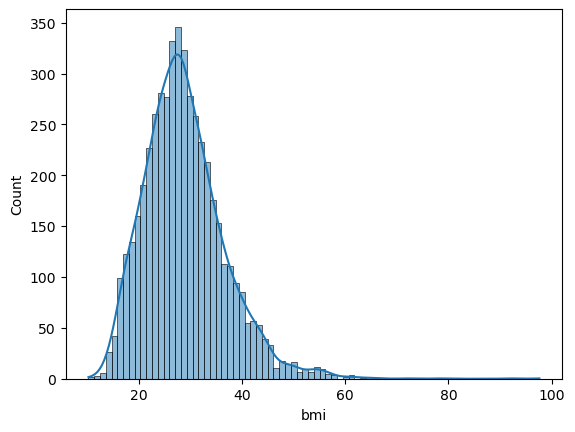

In [15]:
for i in ['bmi']:
    sns.histplot(data=df,x=i,kde=True)
    plt.show()

here bmi is positively skewed distribution data ,so we can choose median 

In [17]:
df['bmi']=df['bmi'].fillna(df['bmi'].median())

In [18]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [19]:
df.duplicated().sum()

0

we found some missing values in the bmi variable and corrected ,then there is no duplicate values in the dataset

# Descriptions

In [22]:
num_df=df.select_dtypes(include='number')
num_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Descripencies

In [24]:
cat_df=df.select_dtypes(include='object')
cat_df

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [25]:
df['smoking_status']=df['smoking_status'].str.replace('Unknown','Not_Confirmed')
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Not_Confirmed      1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [26]:
for i in cat_df.columns:
    print('\n')
    print(df[i].value_counts())



gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


ever_married
Yes    3353
No     1757
Name: count, dtype: int64


work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64


smoking_status
never smoked       1892
Not_Confirmed      1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


In [27]:
df['gender']=df['gender'].replace("Other",np.nan)

In [28]:
df['gender']=df['gender'].fillna(df['gender'].mode()[0])

In [29]:
df['gender'].value_counts()

gender
Female    2995
Male      2115
Name: count, dtype: int64

# outliers

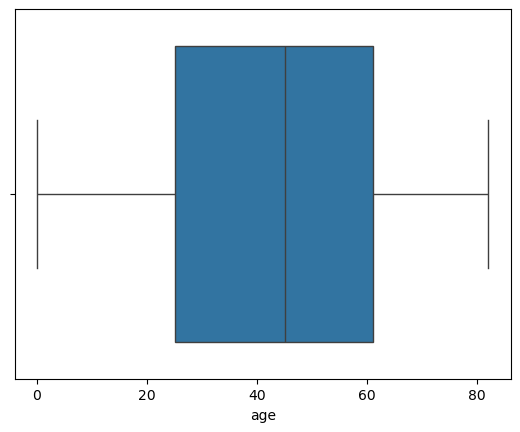

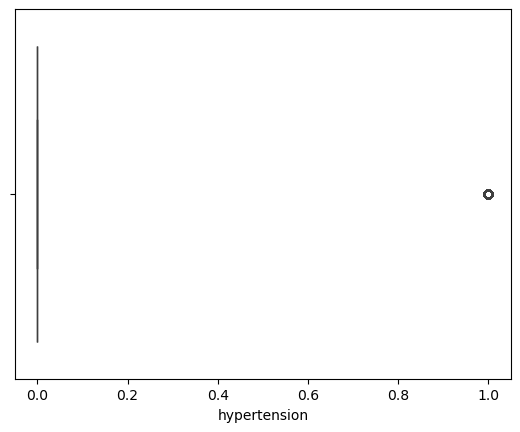

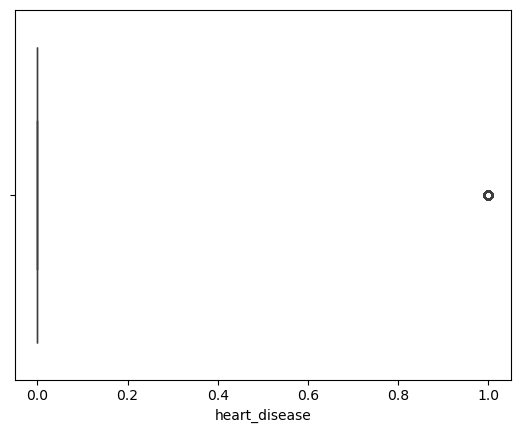

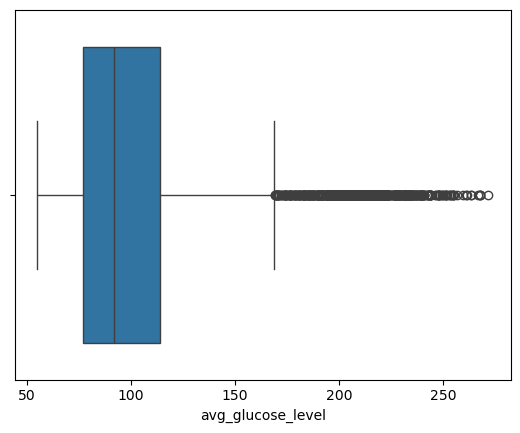

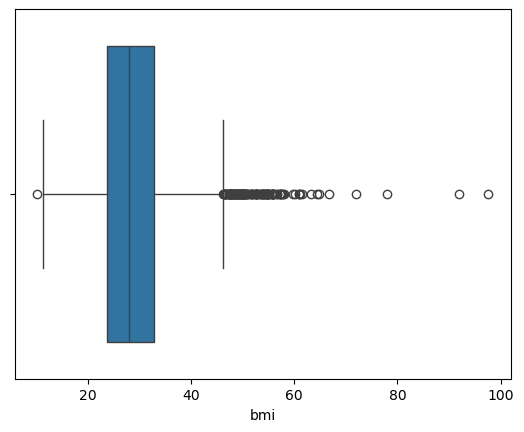

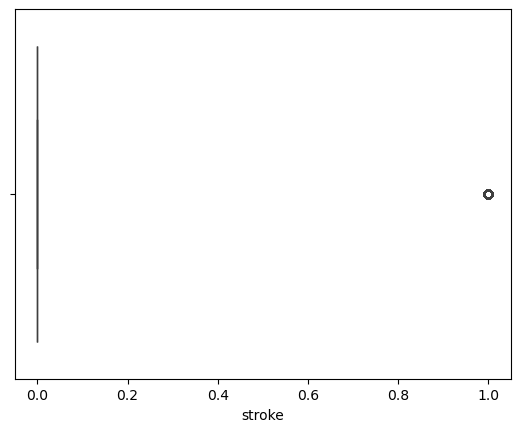

In [31]:
for i in num_df.columns:
    sns.boxplot(data=df,x=i)
    plt.show()

Found outliers in the glucose level and bmi

# outlier capping

In [34]:
 df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [35]:
for i in ['avg_glucose_level','bmi']:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    lc=q1-1.5*iqr
    uc=q3+1.5*iqr
    df[i]=df[i].clip(lower=lc,upper=uc)

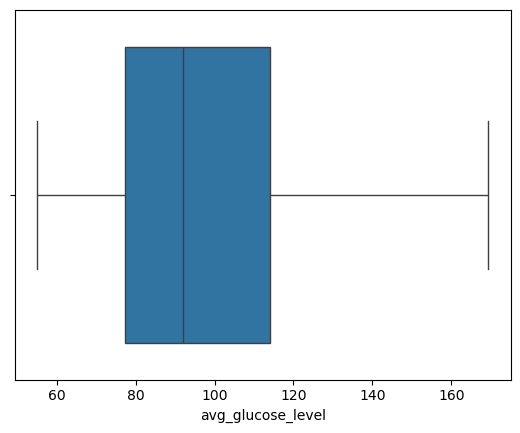

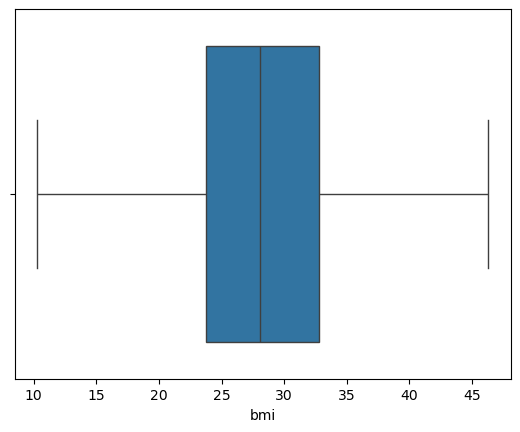

In [36]:
for i in ['avg_glucose_level','bmi']:
    sns.boxplot(data=df,x=i)
    plt.show()

In [37]:
bins=[0,14.0,24.0,44.0,59.0,75.0,100.0]
labels=['child','youth','adult','middle age','elderly','senior']
df['age']=pd.cut(x=df['age'],bins=bins,labels=labels,right=False)

In [38]:
bins=[0,70,100,160,200]
labels=['low','normal','high','Risk']
df['avg_glucose_level']=pd.cut(x=df['avg_glucose_level'],bins=bins,labels=labels,right=False)

bins=[0,18.5,24.5,29.5,34.5,50.0]
labels=['unhealthy','normal','overweight','obesity','Extreme_obesity']
df['bmi']=pd.cut(x=df['bmi'],bins=bins,labels=labels,right=False)



# stroke Data

In [40]:
df2=df[df['stroke']==1]

In [41]:
df2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,elderly,0,1,Yes,Private,Urban,Risk,Extreme_obesity,formerly smoked,1
1,Female,elderly,0,0,Yes,Self-employed,Rural,Risk,overweight,never smoked,1
2,Male,senior,0,1,Yes,Private,Rural,high,obesity,never smoked,1
3,Female,middle age,0,0,Yes,Private,Urban,Risk,obesity,smokes,1
4,Female,senior,1,0,Yes,Self-employed,Rural,Risk,normal,never smoked,1


In [42]:
df2['hypertension'].value_counts()

hypertension
0    183
1     66
Name: count, dtype: int64

# Visulaizations


In [44]:
d1=df2.groupby(by=['gender'])[['hypertension','stroke']].sum().reset_index()
d1


,gender,hypertension,stroke
0,Female,39,141
1,Male,27,108


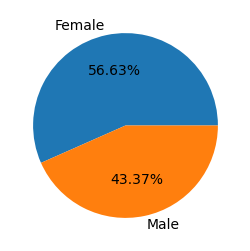

In [45]:
plt.figure(figsize=(3,3))
plt.pie(data=d1,x='stroke',labels='gender',autopct="%1.2f%%")
plt.show()

female has higher strokes than males due to hypertensions,overweight and higher level of glucose. 

# Recommendations

Reduce intake of salt and processed foods.
Avoid fried and oily snacks, fast foods, and preserved items.
Prefer home-cooked balanced meals rich in vegetables, fruits, and whole grains.
Perform 30–40 minutes of exercise daily (walking, cycling, swimming, etc.).
Maintain a healthy body weight with regular physical activity.
practice yoga,meditations reguraly to reduce stress and improve heart health
prefer balanced home cooked meals rich in vegetables,fruits and whole grains.
drink 2-3 liters of water everyday

In [48]:
df2.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [49]:
d2=df2.groupby(by=['bmi','work_type'])[['hypertension','heart_disease','stroke']].sum().reset_index()
d2

,bmi,work_type,hypertension,heart_disease,stroke
0,unhealthy,Govt_job,0,0,0
1,unhealthy,Private,0,0,0
2,unhealthy,Self-employed,0,0,1
3,unhealthy,children,0,0,0
4,normal,Govt_job,2,0,4
5,normal,Private,5,2,21
6,normal,Self-employed,2,2,9
7,normal,children,0,0,0
8,overweight,Govt_job,3,5,19
9,overweight,Private,9,11,57


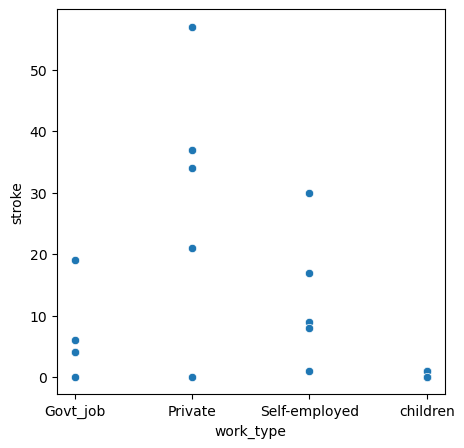

In [50]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=d2,y='stroke',x='work_type')
plt.show()

Higher BMI (Overweight, Obesity, Extreme Obesity) strongly increases stroke risk.

People working in Private and Self-Employed sectors have the highest stroke counts, compared to Govt job and children groups.

Even Normal BMI persons still have strokes, so weight is not the only factor — lifestyle & stress also matter.

# Reccomendations
Those who are working in private companies ,they provide foods- try to avoid 

self employed peoples try to avoid foods at hotels and restaurants.
Avoid excessive salty, oily, fried and fast foods.
Eat a balanced diet with vegetables, fruits, whole grains, and nuts.
Exercise minimum 30–40 minutes per day – walking, jogging, cycling, or swimming.
Practice yoga / meditation at least 10 minutes daily for stress relief.
Drink 2.5 to 3 liters of water a day.
Do regular medical checkups for blood pressure, glucose and cholesterol.

Introduce weekly yoga / exercise sessions.
Provide healthy snacks at workplace (banana, sprouts, nuts).
Replace fast-food canteen items with home-style meals.

Avoid eating street / hotel food daily.
Carry home food while travelling.
Maintain sleep routine and exercise routine.

In [53]:
d3=df2.groupby(by=['smoking_status','avg_glucose_level'])[['hypertension','heart_disease','stroke']].sum().reset_index()
d3

,smoking_status,avg_glucose_level,hypertension,heart_disease,stroke
0,Not_Confirmed,low,2,0,5
1,Not_Confirmed,normal,1,2,18
2,Not_Confirmed,high,1,1,9
3,Not_Confirmed,Risk,0,5,15
4,formerly smoked,low,1,2,8
5,formerly smoked,normal,9,1,19
6,formerly smoked,high,2,2,19
7,formerly smoked,Risk,7,7,24
8,never smoked,low,3,1,11
9,never smoked,normal,10,2,34


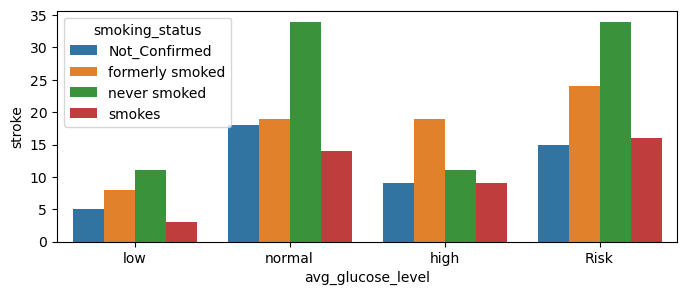

In [54]:
plt.figure(figsize=(8,3))
sns.barplot(data=d3,x='avg_glucose_level',y='stroke',hue='smoking_status')

plt.show()

Stroke cases are highest among people who never smoked and formerly smoked, even though their glucose is normal.
Hypertension
Obesity / Extreme obesity
Heart disease
Even normal glucose does not guarantee low stroke risk if hypertension and obesity are present.
High glucose risk + smoking = major combination for stroke even without severe obesity.
Extreme obesity is the key driver for strokes in this group — glucose control alone is not enough.
Low glucose individuals rarely experience stroke, especially when blood pressure and weight are under control.

# Recommendations

To reduce glucose level
Eat high-fiber & protein foods:
Millets, oats, cereals
Eggs, spinach, milk, dal
Reduce refined carbohydrates & sugar:
Bakery food, soft drinks, sweets, white rice, packed food

To prevent hypertension & obesity
30–40 minutes exercise daily
Walk 10,000 steps per day
Prefer home-cooked food

Reduce:
Salt intake
Fried & oily snacks
Fast food / hotel food
Sleep 7–8 hours daily

To protect mental health
Avoid stress talk openly with family/friends
Practice yoga and meditation weekly it will increase your mental stability.
Avoid isolation by engage in hobbies, sports activies.

In [57]:
d4=df2.groupby(by=['age','Residence_type'])[['stroke']].sum().reset_index()
d4

,age,Residence_type,stroke
0,child,Rural,0
1,child,Urban,1
2,youth,Rural,1
3,youth,Urban,0
4,adult,Rural,4
5,adult,Urban,4
6,middle age,Rural,22
7,middle age,Urban,28
8,elderly,Rural,42
9,elderly,Urban,45


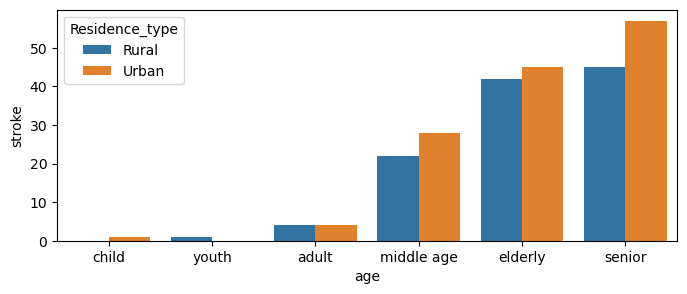

In [58]:
plt.figure(figsize=(8,3))
sns.barplot(data=d4,x='age',y='stroke',hue='Residence_type')
plt.show()

Stroke cases significantly increase after middle age (middle age → elderly → senior).
Urban residents show consistently higher stroke counts than rural residents across all age groups.
Lifestyle patterns in urban areas — less physical activity, high-stress jobs, irregular sleep, fast food consumption — increase risk.
Rural individuals have slightly lower stroke rates, likely due to more physical movement and less sedentary lifestyle.

# Recommendations

Urban
Incorporate at least 30–45 minutes of physical activity daily — walking, jogging, yoga, cycling.
Maintain a balanced diet – reduce fast foods / bakery items / aerated drinks.
Improve sleep habits – minimum 7–8 hours of sleep.
Avoid long sitting hours; take 5 mins movement break every 45 minutes during work.
Encourage health check-ups after age 40:
BP monitoring,Cholesterol check,Glucose check.

For Middle Age & Senior Citizens (High-Risk Categories)
Control blood pressure, glucose, and weight regularly.
Reduce salt and oil usage in food.
Avoid smoking & alcohol.
Do brain-stimulating activities (e.g., reading, puzzles) to reduce neurological decline.
Participate in group walks / activities to avoid stress & loneliness.

# comparisons

In [62]:
d5=df.groupby('hypertension')[['stroke']].sum().reset_index()
d6=df.groupby(by='heart_disease')[['stroke']].sum().reset_index()
d7=df.groupby(by='avg_glucose_level')[['stroke']].sum().reset_index()
d8=df.groupby(by='bmi')[['stroke']].sum().reset_index()
d9=df.groupby(by='smoking_status')[['stroke']].sum().reset_index()

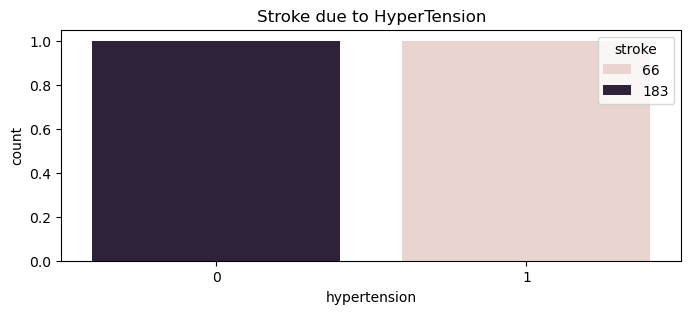

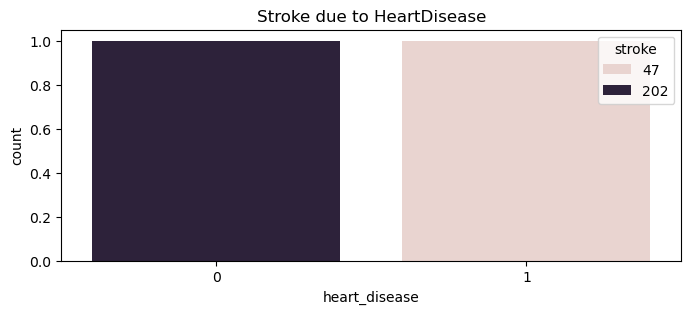

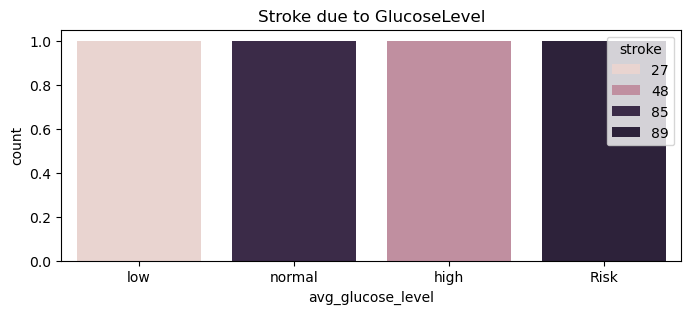

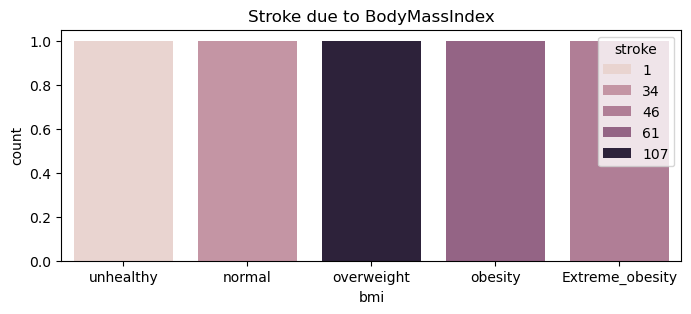

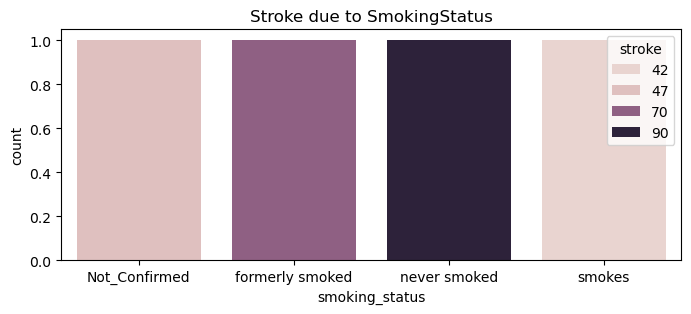

In [63]:
plt.figure(figsize=(8,3))
sns.countplot(data=d5,x='hypertension',hue='stroke')
plt.title("Stroke due to HyperTension")

plt.figure(figsize=(8,3))
sns.countplot(data=d6,x='heart_disease',hue='stroke')
plt.title("Stroke due to HeartDisease")

plt.figure(figsize=(8,3))
sns.countplot(data=d7,x='avg_glucose_level',hue='stroke')
plt.title("Stroke due to GlucoseLevel")

plt.figure(figsize=(8,3))
sns.countplot(data=d8,x='bmi',hue='stroke')
plt.title("Stroke due to BodyMassIndex")

plt.figure(figsize=(8,3))
sns.countplot(data=d9,x='smoking_status',hue='stroke')
plt.title("Stroke due to SmokingStatus")
plt.show()